## Basic approach

Aqui, implementaremos modelos baseados em regras para reconhecer os acordes. Os modelos encontram-se mais profundamente explicados no livro $\textit{Fundamentals of Music Processing Audio}$.

In [24]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob

In [2]:
semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [3]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']
# notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
notes

['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

#### Nomes dos acordes

In [4]:
acordes_7 = [note + '7' for note in notes]
acordes_dim = [note + 'dim' for note in notes]
acordes_maj7 = [note + 'maj7' for note in notes]
acordes_meio_dim = [note + 'meio_dim' for note in notes]
acordes_min7 = [note + 'min7' for note in notes]

#### Definindo os chromas "perfeitos" de cada acorde

Acordes <font color ='red'> maiores </font> com sétima <font color ='red'> maior </font> (maj7)

In [5]:
dict_maj7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 11

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_maj7[i]
    dict_maj7[chord] = acorde_chroma

In [6]:
dict_maj7

{'Cmaj7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 'Dbmaj7': array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Dmaj7': array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Ebmaj7': array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
 'Emaj7': array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.]),
 'Fmaj7': array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.]),
 'Gbmaj7': array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.]),
 'Gmaj7': array([0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.]),
 'Abmaj7': array([1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.]),
 'Amaj7': array([0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.]),
 'Bbmaj7': array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.]),
 'Bmaj7': array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.])}

Acordes <font color ='red'> maiores </font> com sétima <font color ='blue'> menor </font> (7)

In [7]:
dict_7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_7[i]
    dict_7[chord] = acorde_chroma

In [8]:
dict_7

{'C7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Db7': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'D7': array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Eb7': array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
 'E7': array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.]),
 'F7': array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.]),
 'Gb7': array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.]),
 'G7': array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.]),
 'Ab7': array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.]),
 'A7': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]),
 'Bb7': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.]),
 'B7': array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.])}

Acordes <font color ='blue'> menores </font> com sétima <font color ='blue'> menor </font> (min7)

In [9]:
dict_min7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 7
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_min7[i]
    dict_min7[chord] = acorde_chroma

In [10]:
dict_min7

{'Cmin7': array([1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
 'Dbmin7': array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.]),
 'Dmin7': array([1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.]),
 'Ebmin7': array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.]),
 'Emin7': array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 'Fmin7': array([1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Gbmin7': array([0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.]),
 'Gmin7': array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.]),
 'Abmin7': array([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.]),
 'Amin7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]),
 'Bbmin7': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.]),
 'Bmin7': array([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.])}

Acordes <font color ='green'> diminutos </font>

In [11]:
dict_dim = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 6
    setima = fundamental + 9

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_dim[i]
    dict_dim[chord] = acorde_chroma

In [12]:
dict_dim

{'Cdim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Dbdim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Ddim': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'Ebdim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Edim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Fdim': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'Gbdim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Gdim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Abdim': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'Adim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Bbdim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Bdim': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.])}

Acordes <font color ='green'> meio diminutos </font>

In [13]:
dict_meio_dim = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 6
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_meio_dim[i]
    dict_meio_dim[chord] = acorde_chroma

In [14]:
dict_meio_dim

{'Cmeio_dim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.]),
 'Dbmeio_dim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 'Dmeio_dim': array([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Ebmeio_dim': array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Emeio_dim': array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Fmeio_dim': array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'Gbmeio_dim': array([1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.]),
 'Gmeio_dim': array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.]),
 'Abmeio_dim': array([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]),
 'Ameio_dim': array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.]),
 'Bbmeio_dim': array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.]),
 'Bmeio_dim': array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.])}

In [15]:
dict_chords = {**dict_maj7, **dict_7, **dict_min7, **dict_dim, **dict_meio_dim}
dict_chords

{'Cmaj7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 'Dbmaj7': array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Dmaj7': array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Ebmaj7': array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
 'Emaj7': array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.]),
 'Fmaj7': array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.]),
 'Gbmaj7': array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.]),
 'Gmaj7': array([0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.]),
 'Abmaj7': array([1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.]),
 'Amaj7': array([0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.]),
 'Bbmaj7': array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.]),
 'Bmaj7': array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.]),
 'C7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Db7': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'D7': array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

### Carregando os audios para gerar os chromas:

Teste:

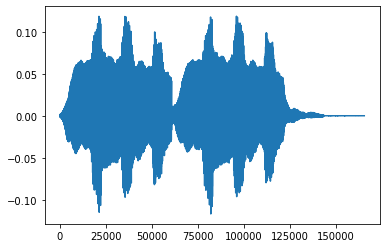

In [65]:
file = '../corpus/generated_chords/audio/dim/Flute/Bdim_outside_now_Flute.ogg'
y, sr = librosa.load(file)

plt.plot(y)

In [66]:
N = len(y)
chroma = librosa.feature.chroma_stft(y=y, 
                                        sr=sr, 
                                        tuning=0.0, 
                                        norm=0, 
                                        hop_length=N+1, 
                                        n_fft=N
                                    )

In [67]:
chroma.shape

(12, 1)

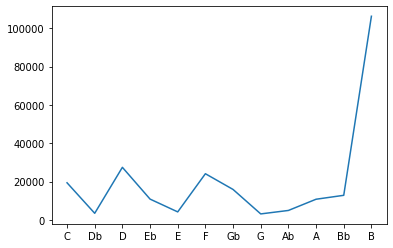

<Figure size 432x288 with 0 Axes>

In [68]:
plt.plot(notes,
          chroma);

# plt.title(chord);
plt.show()
plt.clf()

In [83]:
file.split('/')[-1].split('_')[0]

'Bdim'

In [69]:
dists = {}
for key, value in dict_chords.items():
    chroma_norm = chroma.T/chroma.max()
    dist = np.linalg.norm(value - chroma_norm)
    print('Acorde:', key, '|', 'Distância:', dist)
    dists[key] = dist
    print('--------------------------------')

Acorde: Cmaj7 | Distância: 1.6469446172542885
--------------------------------
Acorde: Dbmaj7 | Distância: 2.058727575656039
--------------------------------
Acorde: Dmaj7 | Distância: 2.032456436613619
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0477252441022347
--------------------------------
Acorde: Emaj7 | Distância: 1.6847741717428013
--------------------------------
Acorde: Fmaj7 | Distância: 2.0284335571789796
--------------------------------
Acorde: Gbmaj7 | Distância: 2.038434963200835
--------------------------------
Acorde: Gmaj7 | Distância: 1.5297830495842848
--------------------------------
Acorde: Abmaj7 | Distância: 2.119825695248948
--------------------------------
Acorde: Amaj7 | Distância: 2.1851042254090465
--------------------------------
Acorde: Bbmaj7 | Distância: 1.9493160556084073
--------------------------------
Acorde: Bmaj7 | Distância: 1.5714590844851364
--------------------------------
Acorde: C7 | Distância: 2.114427618561976
---------

In [86]:
pred = min(dists, key=dists.get)

In [77]:
pd.DataFrame(data=dists.values(), index=dists.keys()).sort_values(0, ascending=True)

,0
Bmeio_dim,1.428795
Bdim,1.466851
Abdim,1.466851
Fdim,1.466851
Ddim,1.466851
G7,1.478402
Bmin7,1.481897
Abmeio_dim,1.518623
Gmaj7,1.529783
Fmeio_dim,1.569572


In [85]:
df_teste = pd.DataFrame()

In [87]:
df_teste.at[0, 'true'] = file.split('/')[-1].split('_')[0]
df_teste.at[0, 'pred'] = pred

In [88]:
df_teste

,true,pred
0,Bdim,Bmeio_dim


In [61]:
os.listdir(corpus_folder)[-1:]

['maj7']

In [62]:
corpus_folder = '../corpus/generated_chords/audio'
files = []

df_model = pd.DataFrame()

# entrando na pasta de cada chord type 
# gerando primeiro pra um chord type apenas, pq demora muito e to curiosa pra ver logo algum resultado pelo menos
for folder in os.listdir(corpus_folder)[-1:]:
      
    instr_folders = [x[0] for x in os.walk(corpus_folder +'/' +folder)][1:]
    
                     
    # entrando na pasta de cada instrumento
    for instr_folder in instr_folders:
        
        # obtendo o caminho para cada arquivo de audio
        for audio_file in glob.glob(instr_folder+'/*.ogg'):

            # obtendo o nome do arquivo
            file_name = audio_file.split('/')[-1]
            
            # carregando o audio com o librosa
            y, sr = librosa.load(audio_file)
            
            
            # calculando o chroma para cada audio
            N = len(y)
            chroma = librosa.feature.chroma_stft(y=y, 
                                                    sr=sr, 
                                                    tuning=0.0, 
                                                    norm=0, 
                                                    hop_length=N+1, 
                                                    n_fft=N
                                                )
            
            # criando um dicionário com as distâncias do acorde real para cada chroma perfeito
            dists = {}
            for key, value in dict_chords.items():
                chroma_norm = chroma.T/chroma.max()
                dist = np.linalg.norm(value - chroma_norm)
#                 print('Acorde:', key, '|', 'Distância:', dist)
                dists[key] = dist
            
            # retornando como output o chroma perfeito com menor distância
            pred = min(dists, key=dists.get)
            
            df_model.at[file_name, 'true'] = audio_file.split('/')[-1].split('_')[0]
            df_model.at[file_name, 'pred'] = pred


In [63]:
df_model

,true,pred
Gbmaj7_agsag-samai_Flute.ogg,Gbmaj7,Gbmaj7
Dmaj7_fandango_Flute.ogg,Dmaj7,Dmaj7
Bmaj7_samba_Flute.ogg,Bmaj7,Bmaj7
Gmaj7_bendir_Flute.ogg,Gmaj7,Gmaj7
Gbmaj7_aka_Flute.ogg,Gbmaj7,Gbmaj7
...,...,...
Fmaj7_venda_clapping_Mandolin.ogg,Fmaj7,Fmaj7
Dmaj7_ruchenitza_2_Mandolin.ogg,Dmaj7,Dmaj7
Fmaj7_venda_Mandolin.ogg,Fmaj7,Fmaj7
Gbmaj7_outside_now_Mandolin.ogg,Gbmaj7,Gbmaj7


In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(df_model['true'], df_model['pred']))

              precision    recall  f1-score   support

          A7       0.00      0.00      0.00         0
         Ab7       0.00      0.00      0.00         0
      Abmaj7       0.96      0.88      0.92       357
  Abmeio_dim       0.00      0.00      0.00         0
      Abmin7       0.00      0.00      0.00         0
       Amaj7       0.98      0.85      0.91       357
   Ameio_dim       0.00      0.00      0.00         0
       Amin7       0.00      0.00      0.00         0
          B7       0.00      0.00      0.00         0
         Bb7       0.00      0.00      0.00         0
      Bbmaj7       0.99      0.91      0.95       357
  Bbmeio_dim       0.00      0.00      0.00         0
      Bbmin7       0.00      0.00      0.00         0
       Bmaj7       0.96      0.89      0.92       357
       Bmin7       0.00      0.00      0.00         0
          C7       0.00      0.00      0.00         0
       Cmaj7       0.93      0.77      0.84       357
   Cmeio_dim       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
